In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly as py
import plotly.graph_objs as go
import requests
from keras.layers import *
from keras.models import *
from keras.callbacks import *
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
plt.style.use('bmh')

Using TensorFlow backend.


In [2]:
'''
https://poloniex.com/support/api/

https://poloniex.com/public?command=returnChartData&currencyPair=USDT_BTC&start=1446300800&end=9999999999&period=86400
'''

'\nhttps://poloniex.com/support/api/\n\nhttps://poloniex.com/public?command=returnChartData&currencyPair=USDT_BTC&start=1446300800&end=9999999999&period=86400\n'

In [3]:
ret = requests.get('https://poloniex.com/public?command=returnChartData&currencyPair=USDT_BTC&start=1446300800&end=9999999999&period=86400')

In [4]:
js = ret.json()
js

[{'date': 1446300800,
  'high': 310.00000001,
  'low': 310.00000001,
  'open': 310.00000001,
  'close': 310.00000001,
  'volume': 0,
  'quoteVolume': 0,
  'weightedAverage': 310.00000001},
 {'date': 1446336000,
  'high': 328.96200408,
  'low': 312.08011732,
  'open': 312.08011732,
  'close': 326.74446166,
  'volume': 1128.35413233,
  'quoteVolume': 3.49849756,
  'weightedAverage': 322.52534494},
 {'date': 1446422400,
  'high': 370.02602501,
  'low': 320.366901,
  'open': 326.744471,
  'close': 369.02958148,
  'volume': 10188.31647562,
  'quoteVolume': 28.73601239,
  'weightedAverage': 354.54872225},
 {'date': 1446508800,
  'high': 424,
  'low': 355.87499999,
  'open': 366.1,
  'close': 400,
  'volume': 28008.4737616,
  'quoteVolume': 72.386865,
  'weightedAverage': 386.92756982},
 {'date': 1446595200,
  'high': 477,
  'low': 359.48965566,
  'open': 399.99,
  'close': 393,
  'volume': 50090.55955153,
  'quoteVolume': 117.31877368,
  'weightedAverage': 426.96115873},
 {'date': 1446681600

In [5]:
df = pd.DataFrame(js)
df
scaler = MinMaxScaler()
df[['close']] = scaler.fit_transform(df[['close']])
df

,date,high,low,open,close,volume,quoteVolume,weightedAverage
0,1446300800,310.000000,310.000000,310.000000,0.000000,0.000000e+00,0.000000,310.000000
1,1446336000,328.962004,312.080117,312.080117,0.000885,1.128354e+03,3.498498,322.525345
2,1446422400,370.026025,320.366901,326.744471,0.003121,1.018832e+04,28.736012,354.548722
3,1446508800,424.000000,355.875000,366.100000,0.004759,2.800847e+04,72.386865,386.927570
4,1446595200,477.000000,359.489656,399.990000,0.004389,5.009056e+04,117.318774,426.961159
5,1446681600,416.058001,366.710971,393.000000,0.003865,2.272378e+04,57.946948,392.148011
6,1446768000,398.888889,350.000000,382.500000,0.003648,1.575391e+04,42.557013,370.183553
7,1446854400,397.333333,367.300099,367.300099,0.004283,1.413555e+04,36.733756,384.810840
8,1446940800,389.350000,369.000000,384.500001,0.003225,3.371051e+03,8.944224,376.896921
9,1447027200,387.910000,363.000000,371.000067,0.003942,1.179662e+04,31.789259,371.088131


In [6]:
price = df['close'].values.tolist()
price

[0.0,
 0.0008853413868772191,
 0.003121111482579767,
 0.004758631628512006,
 0.00438851583514217,
 0.0038650663538327412,
 0.003648284248402498,
 0.004282768462435509,
 0.003225294770794279,
 0.003941733198860011,
 0.0013324247395978053,
 0.00016549463279234497,
 0.001533336857717723,
 0.0015339681695138406,
 0.0015962565425905947,
 0.0004229894776082155,
 0.0011632210643478871,
 0.001269502671179222,
 0.0013911072912818657,
 0.0010045999571728463,
 0.0009252894834245878,
 0.0009940252725643695,
 0.001157933695871173,
 0.0008179559028185998,
 0.0005816105319095752,
 0.0008983239036646183,
 0.0023846704478413666,
 0.0027494292047812313,
 0.002432189498758751,
 0.0034367895114489656,
 0.0036747210902573213,
 0.0028551789768957066,
 0.002942681319728725,
 0.0030138000301395927,
 0.0029350182408940557,
 0.0037249791445057474,
 0.0042457606276128795,
 0.004451981602603738,
 0.005739665763763408,
 0.005921852688101262,
 0.006089821814628079,
 0.007545074820497828,
 0.006352996866708798,
 0.0

In [7]:
'''
Many to many
X
0.0008853413868772191,
 0.003121111482579767,
 0.004758631628512006,
Y
0.00438851583514217,
 0.0038650663538327412,

Many to one

X
(sample, 5, 1)
0.0008853413868772191,
 0.003121111482579767,
 0.004758631628512006,
 0.00438851583514217,
 0.0038650663538327412,
Y
(sample, 1)
 0.003648284248402498,
'''

window_size = 5

X = []
Y = []

for i in range(len(price) - window_size):
    X.append([price[i + j] for j in range(window_size)])
    Y.append(price[window_size + i])


In [8]:
X = np.array(X)
Y = np.array(Y)

print(X)
print(Y)

[[0.         0.00088534 0.00312111 0.00475863 0.00438852]
 [0.00088534 0.00312111 0.00475863 0.00438852 0.00386507]
 [0.00312111 0.00475863 0.00438852 0.00386507 0.00364828]
 ...
 [0.51945052 0.51782446 0.53263633 0.51869191 0.51958862]
 [0.51782446 0.53263633 0.51869191 0.51958862 0.53209294]
 [0.53263633 0.51869191 0.51958862 0.53209294 0.52197558]]
[0.00386507 0.00364828 0.00428277 ... 0.53209294 0.52197558 0.51684027]


In [9]:
train_test_split = 1200

X_train = X[:train_test_split, :]
Y_train = Y[:train_test_split]

X_test = X[train_test_split:, :]
Y_test = Y[train_test_split:]

In [10]:
X_train = np.reshape(X_train, (X_train.shape[0], window_size, 1))
X_test = np.reshape(X_test, (X_test.shape[0], window_size, 1))

In [11]:
X_train[0]

array([[0.        ],
       [0.00088534],
       [0.00312111],
       [0.00475863],
       [0.00438852]])

In [12]:
model = Sequential()
model.add(LSTM(128, input_shape=(5, 1, )))
model.add(Dropout(0, 2))
model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer='adam')
model.summary()

W0828 14:20:59.678179  5416 deprecation_wrapper.py:119] From C:\Users\brb11\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0828 14:20:59.691192  5416 deprecation_wrapper.py:119] From C:\Users\brb11\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0828 14:20:59.693193  5416 deprecation_wrapper.py:119] From C:\Users\brb11\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0828 14:20:59.802291  5416 deprecation_wrapper.py:119] From C:\Users\brb11\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 128)               66560     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.fit(X_train, Y_train, epochs=10, batch_size=1)

W0828 14:21:00.519998  5416 deprecation.py:323] From C:\Users\brb11\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0828 14:21:00.822280  5416 deprecation_wrapper.py:119] From C:\Users\brb11\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0828 14:21:00.862308  5416 deprecation_wrapper.py:119] From C:\Users\brb11\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:973: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.



Epoch 1/10
1200/1200 [==============================] - 4s 4ms/step - loss: 0.0023
Epoch 2/10
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0011
Epoch 3/10
1200/1200 [==============================] - 4s 3ms/step - loss: 9.0016e-04
Epoch 4/10
1200/1200 [==============================] - 4s 3ms/step - loss: 7.5255e-04
Epoch 5/10
1200/1200 [==============================] - 4s 3ms/step - loss: 6.2645e-04
Epoch 6/10
1200/1200 [==============================] - 4s 3ms/step - loss: 5.8800e-04
Epoch 7/10
1200/1200 [==============================] - 4s 3ms/step - loss: 5.0625e-04
Epoch 8/10
1200/1200 [==============================] - 4s 3ms/step - loss: 4.1442e-04
Epoch 9/10
1200/1200 [==============================] - 4s 3ms/step - loss: 4.2035e-04
Epoch 10/10
1200/1200 [==============================] - 4s 3ms/step - loss: 4.0376e-04


In [14]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

test_predict.shape

(193, 1)

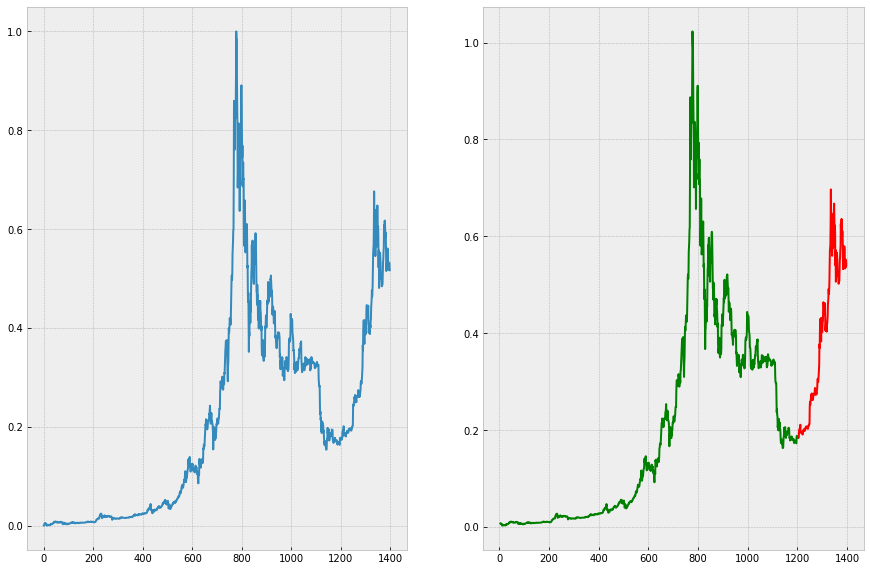

In [15]:
plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plt.plot(price)

plt.subplot(1, 2, 2)
split_pt = train_test_split + window_size
plt.plot(np.arange(window_size, split_pt, 1), train_predict, color='g')

plt.plot(np.arange(split_pt, split_pt+len(test_predict), 1), test_predict, color='r')

In [16]:
np.arange(window_size, split_pt, 1), train_predict
np.arange(split_pt, split_pt+len(test_predict), 1), test_predict

trace1 = go.Scatter(x = np.arange(window_size, split_pt, 1), y = train_predict.reshape(1200), mode='lines', name='train')
trace2 = go.Scatter(x = np.arange(split_pt, split_pt+len(test_predict), 1), y = test_predict.reshape(191), mode='lines', name='test')
trace3 = go.Scatter(x = np.arange(1, len(price), 1), y = price, mode='lines', name='origin')

data = [trace1, trace2, trace3]
py.offline.plot(data)

ValueError: cannot reshape array of size 193 into shape (191,)